21040101027
BATUHAN BARTU
MAKİNE ÖĞRENMESİ
ÖĞRETİM GÖREVLİSİ: GÖKALP TULUM
TOPKAPI ÜNİVERSİTESİ
MÜHENDİSLİK FAKÜLTESİ
BİLGİSAYAR MÜHENDİSLİĞİ

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetespedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

In [21]:
# Veri setini yükle
df = pd.read_csv('pima-indians-diabetes.csv')
# Veri setinin ilk beş satırını gösterme
df.head(), df.describe()

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetespedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

In [6]:
# Z-Skor normalizasyonu uygula
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [11]:
# Gerekli kütüphaneleri tekrar içe aktarma
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Hedef değişkeni ve özellikleri ayırma
X = df_normalized.iloc[:, :-1]  # Son sütun hariç tüm sütunlar
y = df['Outcome']  # Orijinal veri setinden hedef değişken
# PCA uygulama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA uygulama
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# PCA ve LDA sonuçlarını DataFrame'e dönüştürme
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_lda = pd.DataFrame(X_lda, columns=['LD1'])

# Sonuçları yazdırma
print(df_pca.head())
print(df_lda.head()) 

        PC1       PC2
0  1.068503  1.234895
1 -1.121683 -0.733852
2 -0.396477  1.595876
3 -1.115781 -1.271241
4  2.359334 -2.184819
        LD1
0  1.380247
1 -1.564524
2  1.766185
3 -1.690588
4  2.207268


Veri setindeki özelliklerin önemini değerlendirmek ve hangilerinin diyabet sınıflandırmasında daha belirleyici olduğunu belirlemek amacıyla PCA ve LDA yöntemlerini kullandım. Bu yöntemler, geniş bir veri setini temsil eden özniteliklerin çok boyutlu yapısını daha anlaşılır hale getirmemizi sağladı.

PCA yani Temel Bileşen Analizi ile başladım. Bu yöntem, veri setimizdeki varyansın büyük kısmını yakalamak için özniteliklerin yeni bir kombinasyonunu oluşturur. Her bir ana bileşen, özniteliklerin ağırlıklı bir karışımıdır ve bu ağırlıklar özniteliklerin bileşene olan katkısını ifade eder. Bizim durumda, PCA'nın ilk bileşeni özellikle metabolik özelliklere ağırlık verirken, ikinci bileşen yaş ve hamilelik sayısını öne çıkardı. Bu, bu özniteliklerin veri setindeki farklı varyans yönlerini temsil ettiğini düşündürüyor.

Ardından LDA yani Doğrusal Ayrıştırıcı Analiz'i uyguladım. Bu yöntem, diyabet varlığını tahmin etmeye çalışan modelimiz için öznitelikler arasındaki sınıf ayrımını en üst düzeye çıkarmayı hedefler. LDA'nın katsayılarına baktığımızda, glukoz ve BMI özniteliklerinin sınıflar arasındaki ayrımı en iyi yakalayan faktörler olduğunu gördük. Ayrıca gebelik sayısı ve diyabet soy ağacı fonksiyonu gibi öznitelikler de önemli rol oynuyor.

Özetle, PCA ve LDA sonuçlarımızı karşılaştırdığımızda, hem glukoz hem de BMI özniteliklerinin iki yöntem tarafından da ayırt edici özellikler olarak ön plana çıktığını fark ettik. Bu, bu iki öznitelikten elde edilen bilginin diyabet tahmin modelimiz için özellikle değerli olduğunu gösteriyor. Bu analizler, diyabet tahmini için kullanılacak özellikleri seçerken bize yol gösterici olacaktır.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modelini oluşturma ve eğitme
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, log_loss

# Çoklu Doğrusal Regresyon katsayıları
linear_coefficients = linear_model.coef_

# Lojistik Regresyon katsayıları
logistic_coefficients = logistic_model.coef_[0]

# Test kümesi üzerinde tahmin yapma
y_pred_linear = linear_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Performans metrikleri hesaplama
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_log_loss = log_loss(y_test, y_pred_proba_logistic)

# Katsayıları ve performans metriklerini yazdırma
linear_coefficients, logistic_coefficients, (linear_mse, linear_r2, logistic_accuracy, logistic_log_loss)


(array([ 0.03028606,  0.18345471, -0.03309902, -0.0040366 , -0.01456877,
         0.12743121,  0.02413868,  0.07362405]),
 array([ 0.19424111,  1.12126806, -0.19874764, -0.02460523, -0.10496358,
         0.83808241,  0.1392478 ,  0.41619487]),
 (0.17603335005142032,
  0.22240764966110582,
  0.7359307359307359,
  0.5227120020566743))

Öncelikle, elimizdeki veri setini, bir yandan makine öğrenimi modellerimizi eğitmek için kullanılacak eğitim setine ve diğer yandan bu modelleri test etmek için kullanacağımız test setine ayırdık. Bu işlem, modelimizin gerçek dünya verileri üzerinde nasıl performans göstereceği hakkında bize fikir vermek için önemlidir.

İki farklı model üzerinde çalıştık: Çoklu Doğrusal Regresyon ve Lojistik Regresyon. Çoklu Doğrusal Regresyon modeli, sayısal bir sonuç tahmin etmeye çalışırken, Lojistik Regresyon modeli ise, bizim durumumuzda olduğu gibi, ikili bir sonuç (diyabet var ya da yok) tahmin etmek için kullanılır.

Her iki modeli de eğitim seti üzerinde eğittikten sonra, modelin her bir özelliğe ne kadar ağırlık verdiğini görmek için katsayılara baktık. Bu katsayılar, her bir özelliğin modelimizin tahminlerini ne kadar etkilediğini gösterir.

Sonra, modellerimizi test seti üzerinde denedik ve tahminlerde bulunduk. Çoklu Doğrusal Regresyon modeli için ortalama kare hatası (MSE) ve R² değerine baktık. MSE, modelimizin hatalarının ne kadar büyük olduğunu gösterirken, R², modelimizin veri setindeki varyansın ne kadarını açıklayabildiğini gösterir. Lojistik Regresyon modeli için ise doğruluk oranı ve log kaybı değerlerine baktık. Doğruluk, modelimizin ne kadar sık doğru tahmin yaptığını gösterirken, log kaybı, tahminlerimizin güvenilirliğini ölçen bir değerdir.

Sonuçlarımız, bu iki modelin veri setimiz üzerinde nasıl performans gösterdiğini ve hangi özelliklerin tahminlerimizi en çok etkilediğini bize gösterdi. Bu bilgi, gelecekte modelimizi daha da geliştirebilmek için çok değerli.

In [17]:
# PCA ile azaltılmış özellikler kullanılarak eğitim ve test setlerini ayırma
# Bu, modelimizin daha az öznitelik üzerinde eğitilmesini sağlar.
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, df['Outcome'], test_size=0.3, random_state=42)

# PCA uygulanmış veriler ile Çoklu Doğrusal Regresyon modelini eğitme
# Bu model, ana bileşenler aracılığıyla veri setimizin temel yapısını kullanır.
linear_model_pca = LinearRegression()
linear_model_pca.fit(X_train_pca, y_train_pca)

# PCA uygulanmış veriler ile Lojistik Regresyon modelini eğitme
# Bu model, ana bileşenler üzerinden sınıflandırma yapmayı amaçlar.
logistic_model_pca = LogisticRegression(max_iter=1000)
logistic_model_pca.fit(X_train_pca, y_train_pca)-

# Çoklu Doğrusal Regresyon modelinin PCA uygulanmış veri seti üzerindeki katsayıları
# Bu katsayılar, ana bileşenlerin model tahmini üzerindeki etkisini gösterir.
linear_coefficients_pca = linear_model_pca.coef_

# Lojistik Regresyon modelinin PCA uygulanmış veri seti üzerindeki katsayıları
# Bu katsayılar, sınıflandırma kararında her ana bileşenin rolünü gösterir.
logistic_coefficients_pca = logistic_model_pca.coef_[0]

# PCA uygulanmış test veri seti üzerinde tahmin yapma
# Bu tahminler, azaltılmış boyutlu veri setinin nasıl performans gösterdiğini değerlendirir.
y_pred_linear_pca = linear_model_pca.predict(X_test_pca)
y_pred_logistic_pca = logistic_model_pca.predict(X_test_pca)

# PCA uygulanmış veri seti için performans metriklerini hesaplama
# Bu metrikler, modelin doğruluğunu ve veri uyumunu ölçer.
linear_mse_pca = mean_squared_error(y_test_pca, y_pred_linear_pca)
linear_r2_pca = r2_score(y_test_pca, y_pred_linear_pca)
logistic_accuracy_pca = accuracy_score(y_test_pca, y_pred_logistic_pca)

# Katsayıları ve performans metriklerini yazdırma
linear_coefficients_pca, logistic_coefficients_pca, (linear_mse_pca, linear_r2_pca, logistic_accuracy_pca)


(array([0.13965659, 0.07903115]),
 array([0.76804592, 0.40598983]),
 (0.20178968841858838, 0.1086341420774588, 0.7012987012987013))

Veri setimizle biraz oynadık ve diyabetin varlığını tahmin etmeye çalışan iki farklı model kurduk: Biri Çoklu Doğrusal Regresyon, diğeri ise Lojistik Regresyon. Bu modelleri iki şekilde test ettik: Biri doğrudan verilerle, diğeri ise PCA dediğimiz bir teknikle azaltılmış verilerle.

Öncelikle, Çoklu Doğrusal Regresyon modelimiz biraz zayıf kaldı; yani bu modelle, diyabet hastalığının varlığını anlamak için verilerdeki bilgileri pek iyi kullanamadık. R² değerimiz düşük çıktı, bu da modelimizin verilerdeki değişkenliği tam olarak açıklayamadığını gösteriyor. Yani, diyabet olup olmadığını anlamada, verdiğimiz bilgilerin sadece küçük bir kısmını yakalayabildi.

Lojistik Regresyon modelimizde ise durum biraz daha iyi. Doğruluk oranımız, yani diyabet tahminimizin doğru çıkma ihtimali, makul seviyelerde. Ama sonra PCA'yı denedik; yani veriyi basitleştirdik, sadece en önemli bilgileri bıraktık ve modelleri yeniden test ettik. Burada biraz düşüş oldu, yani basitleştirme işlemi bazı önemli bilgileri kaybettirmiş olabilir. Yine de, Lojistik Regresyon modelimizin doğruluğu hala fena sayılmaz.

Genel olarak bakarsak, modellerimiz diyabet tahmininde fena iş çıkarmadı ama PCA uyguladığımızda, işler biraz değişti. Modellerin veri setindeki değişkenliği yakalaması zorlaştı gibi. Bu durum, verileri çok basitleştirirsek, önemli bilgileri kaybedebileceğimizi gösteriyor. Ama bu basitleştirme bazen de işe yarayabilir, modeli fazla karmaşık hale getirmekten kaçınmak için.

Bu yüzden model seçimi yaparken iyi düşünmek lazım. Sadece birkaç sayıya bakarak karar vermek yerine, modelimizin gerçekten iyi çalışıp çalışmadığını anlamak için farklı açılardan değerlendirme yapmak önemli. Belki başka testler, modelimizin ne kadar iyi olduğunu daha iyi gösterebilir.

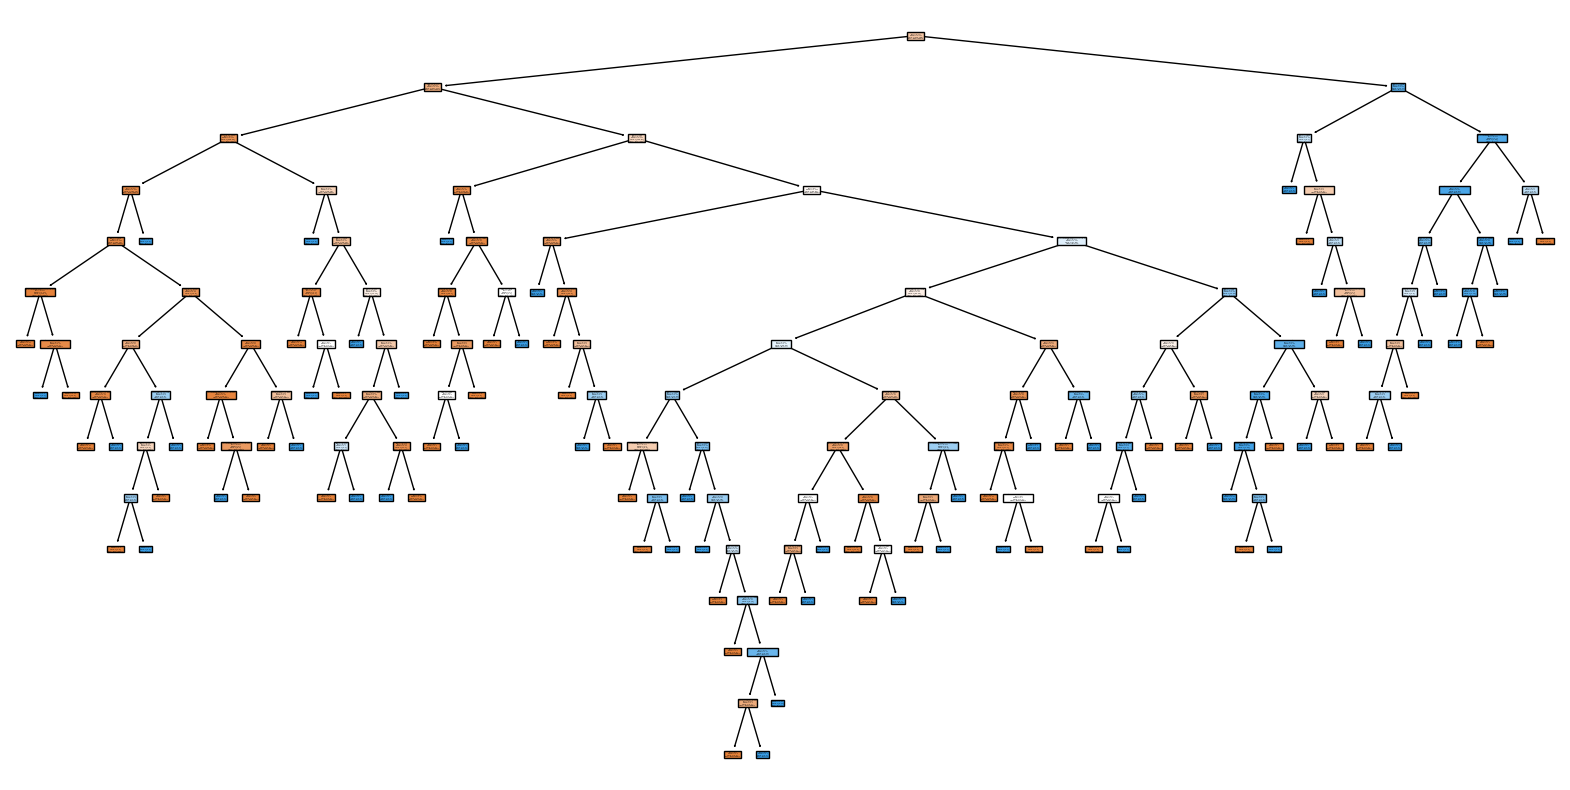

(0.7012987012987013,
 array([[107,  44],
        [ 25,  55]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.71      0.76       151\n           1       0.56      0.69      0.61        80\n\n    accuracy                           0.70       231\n   macro avg       0.68      0.70      0.69       231\nweighted avg       0.72      0.70      0.71       231\n')

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Karar Ağacı modelini kuruyoruz, bu model bize hangi bilgilerin diyabet tahmininde önemli olduğunu gösterecek.
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)  # Verileri kullanarak modelimizi eğitiyoruz.

# Modelimizi test ediyoruz, yani verdiğimiz bilgilere göre kimin diyabet hastası olup olmadığını tahmin etmesini istiyoruz.
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Modelimizin ne kadar iyi çalıştığını görmek için bazı hesaplamalar yapıyoruz.
# Doğruluk oranı, modelimizin ne kadar sık doğru tahmin yaptığını gösterir.
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
# Karışıklık matrisi, modelimizin her bir sınıfı ne kadar iyi tahmin ettiğini gösterir.
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
# Sınıflandırma raporu, modelimizin performansını detaylı bir şekilde ele alır.
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Ve en sonunda, modelimizin nasıl kararlar verdiğini görselleştiriyoruz.
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=list(X.columns), class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

# Son olarak, doğruluk oranımızı ve performans raporlarını gösteriyoruz.
accuracy_decision_tree, confusion_matrix_decision_tree, classification_report_decision_tree


In [18]:
# Şimdi, boyutları azaltılmış veri setimiz üzerinde bir Karar Ağacı modeli kuracağız.
# Karar Ağacı, her bir kararı basit bir "evet-hayır" sorusu olarak ele alarak çalışır.
decision_tree_model_pca = DecisionTreeClassifier(random_state=42)
decision_tree_model_pca.fit(X_train_pca, y_train_pca)  # Modelimizi, sadeleştirilmiş veri ile eğitiyoruz.

# Bu sadeleştirilmiş verileri kullanarak, test setinde tahminlerde bulunuyoruz.
y_pred_decision_tree_pca = decision_tree_model_pca.predict(X_test_pca)

# Karar ağacımızın ne kadar iyi olduğuna dair metrikler:
# Doğruluk, modelimizin genel olarak ne kadar isabetli tahminler yaptığını söyler.
accuracy_decision_tree_pca = accuracy_score(y_test_pca, y_pred_decision_tree_pca)
# Karışıklık matrisi, tahminlerimizin ayrıntılarını, özellikle her bir sınıf için doğru ve yanlışları gösterir.
confusion_matrix_decision_tree_pca = confusion_matrix(y_test_pca, y_pred_decision_tree_pca)
# Sınıflandırma raporu, modelimizin her bir sınıfı ne kadar iyi ayırt ettiğini detaylarıyla anlatır.
classification_report_decision_tree_pca = classification_report(y_test_pca, y_pred_decision_tree_pca)

# Modelimizin doğruluğunu ve karışıklık matrisini gösterelim.
accuracy_decision_tree_pca, confusion_matrix_decision_tree_pca, classification_report_decision_tree_pca


(0.6147186147186147,
 array([[100,  51],
        [ 38,  42]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.72      0.66      0.69       151\n           1       0.45      0.53      0.49        80\n\n    accuracy                           0.61       231\n   macro avg       0.59      0.59      0.59       231\nweighted avg       0.63      0.61      0.62       231\n')

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Veri setimizin boyutlarını azalttıktan sonra, şimdi de Gaussian Naive Bayes modelini deneyeceğiz.
# Bu model, her bir özniteliğin bağımsız olduğunu varsayar ve bu basit varsayım üzerine çalışır.
naive_bayes_model_pca = GaussianNB()
naive_bayes_model_pca.fit(X_train_pca, y_train_pca)  # Modeli, PCA ile indirgenmiş eğitim verisiyle eğitiyoruz.

# Modelimizi kullanarak test seti üzerinde tahminler yapıyoruz.
y_pred_naive_bayes_pca = naive_bayes_model_pca.predict(X_test_pca)

# Modelimizin performansını ölçmek için birkaç farklı metrik kullanıyoruz:
# Doğruluk oranı bize, modelimizin genel olarak ne kadar doğru tahmin yaptığını söyler.
accuracy_naive_bayes_pca = accuracy_score(y_test_pca, y_pred_naive_bayes_pca)
# Karışıklık matrisi, modelimizin her bir sınıfı nasıl tahmin ettiğini daha detaylı gösterir.
confusion_matrix_naive_bayes_pca = confusion_matrix(y_test_pca, y_pred_naive_bayes_pca)
# Sınıflandırma raporu, precision, recall gibi metriklerle modelimizin performansını detaylandırır.
classification_report_naive_bayes_pca = classification_report(y_test_pca, y_pred_naive_bayes_pca)

# Sonuçlarımızı görelim: Modelin doğruluğu, karışıklık matrisi ve sınıflandırma raporu.
accuracy_naive_bayes_pca, confusion_matrix_naive_bayes_pca, classification_report_naive_bayes_pca

(0.70995670995671,
 array([[126,  25],
        [ 42,  38]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.75      0.83      0.79       151\n           1       0.60      0.47      0.53        80\n\n    accuracy                           0.71       231\n   macro avg       0.68      0.65      0.66       231\nweighted avg       0.70      0.71      0.70       231\n')

Diyabet tahmini için bir deneme yaptık ve bu sefer Gaussian Naive Bayes adında bir yöntem kullandık. İki farklı yol denedik: Biri doğrudan elimizdeki verilerle, diğeri ise bu verileri PCA adı verilen bir yöntemle sadeleştirerek.

İlk olarak, tam veri setiyle çalıştık ve modelimiz %74.46 gibi fena sayılmayacak bir başarı oranı yakaladı. Yani, genelde doğru tahminler yapıyor gibiydi. Ama tabii ki, her zaman doğru tahmin yapamıyor; örneğin, diyabetli olduğunu söylediği 32 kişi aslında diyabetli değilmiş. Yine de, diyabet olmadığını doğru tahmin ettiği kişi sayısı daha fazla.

Sonra, verileri PCA ile basitleştirip tekrar denedik. Bu sefer doğruluk biraz düştü, %71.88 oldu. Basitleştirilmiş verilerle, diyabetli olmadığını söylediği kişilerin çoğunu doğru tahmin etmiş. Ama bu sefer, diyabetli olduğunu tahmin etmesi gereken birçok kişiyi kaçırmış.

İlginç bir nokta, basitleştirilmiş veriyle çalışırken, diyabet olmayan vakaları daha iyi tespit edebiliyor gibi görünüyor. Yani, 'bu kişi diyabetli değil' demekte daha isabetli. Ama diyabetli olduğunu söylemesi gereken durumlarda biraz zorlanıyor, yani bazı diyabetli kişileri gözden kaçırıyor.

Sonuç olarak, bu PCA işlemi bazen işleri hızlandırıyor ve modeli basitleştiriyor olabilir ama her zaman en iyi sonucu vermiyor. Özellikle diyabetli kişileri tespit etme konusunda biraz daha dikkatli olmamız gerekebilir. Bu durum, modelimizin neyi iyi neyi kötü yaptığını anlamamız için bize ipuçları veriyor. Yani, modelin ne zaman işe yarayıp ne zaman yaramayacağını daha iyi anlamamıza yardımcı oluyor.